In [5]:
#modularity
#Ex: try to do clustering for the given data set.
#Step 1: use modularity to run clustering by the geodesic distance.
#Step 2: use modularity to run clustering by the Euclidean distance.
#Step 3: use k-mean to run clustering again according to the result of Step 1.
#Step 4: use k-mean to run clustering again according to the result of Step 2.

#mat files are actually saved using the HDF5 format by default

In [6]:
import numpy as np
import pandas as pd
import scipy.io


XYZ_Coord = scipy.io.loadmat('C:\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [7]:
XYZ_Edges = pd.read_csv('C:\Edges.csv')
XYZ_Edges

XYZ_Edges_Euclidean = pd.read_csv('C:\Edges_Euclidean.csv')
XYZ_Edges_Euclidean

,Source,Target,Weight,Type
0,1,2,25.805000,Undirected
1,1,3,20.209800,Undirected
2,1,4,11.132300,Undirected
3,1,5,0.797637,Undirected
4,1,6,19.088000,Undirected
5,1,7,12.826500,Undirected
6,1,8,30.546200,Undirected
7,1,9,32.626900,Undirected
8,1,10,34.938900,Undirected
9,1,11,10.086300,Undirected


In [9]:
#geodesic distance
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

#Euclidean distance
XYZ_E_Euclidean = np.array(XYZ_Edges_Euclidean.iloc[:, 0:3].values)
XYZ_E_Euclidean

array([[1.00000e+00, 2.00000e+00, 2.58050e+01],
       [1.00000e+00, 3.00000e+00, 2.02098e+01],
       [1.00000e+00, 4.00000e+00, 1.11323e+01],
       ...,
       [1.99800e+03, 1.99900e+03, 2.07885e+01],
       [1.99800e+03, 2.00000e+03, 2.10063e+01],
       [1.99900e+03, 2.00000e+03, 2.38010e+00]])

In [10]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G.add_weighted_edges_from([(e)])    
    
R = nx.Graph()
for i in range(0, len(XYZ_E_Euclidean)):    
    e = ( str(int(XYZ_E_Euclidean[i,0])), str(int(XYZ_E_Euclidean[i,1])), XYZ_E_Euclidean[i,2] )
    R.add_weighted_edges_from([(e)])    



In [11]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

partition = community.best_partition(R)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,R)
print("modularity:", mod)

community: 42.0
modularity: 0.937223811160394
community: 1.0
modularity: -3.68594044175552e-14


Community 0
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '15

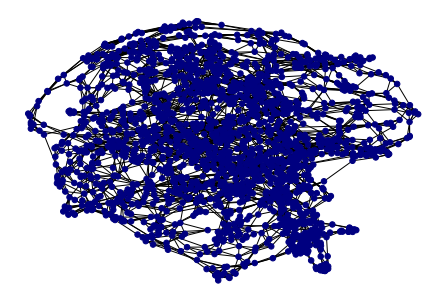

Community 0
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '15

In [ ]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in R.nodes()]
nx.draw_spring(R, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [ ]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))            

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)